# WatChMaL: Time Experiments
### Iñaki Erregue Álvarez-Buhilla

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import *
from utils.utils import *

# 1 - Time as a channel

In [62]:
base_path = './data/channel/'

labels = np.load(base_path+'/labels.npy')
test_idxs = np.load(base_path+'/indices.npy')
split_idxs = np.load(base_path+'/IWCD_mPMT_Short_2_class_idxs_xps.npz')

subfolders = [os.path.basename(os.path.normpath(f.path)) for f in os.scandir(base_path) if f.is_dir()]

In [63]:
data_splitting(split_idxs)

Total num. of events:  2950284
Events for testing: 10.004
Events for validation: 2.399
Events for training: 87.596


In [64]:
results = []
for mode in subfolders:
    results.append(basic_metrics(base_path, labels,mode))

In [65]:
pd.set_option("display.precision", 4)
df = pd.DataFrame(results)

df['charge'] = np.where(df['model'].str.contains('Q'), 1, 0)
df['time'] = np.where(df['model'].str.contains('T'), 1, 0)
df['scaled'] = np.where(df['model'].str.contains('u'), 0, 1)
df['collapsed'] = np.where(df['model'].str.contains('s'), 1, 0)

df['total_score'] = df.acc+df.f1+df.auc-df.log_loss

df.sort_values(by='total_score', inplace=True, ascending=False)
df = df[['model','charge', 'time', 'scaled', 'collapsed', 'log_loss', 'acc', 'f1', 'auc', 'opt_threshold', 'total_score']].reset_index(drop=True)

df.head(len(subfolders))

,model,charge,time,scaled,collapsed,log_loss,acc,f1,auc,opt_threshold,total_score
0,Quo,1,0,0,0,0.5940,0.6747,0.6579,0.7434,0.4833,1.4820
1,Q+Ts,1,1,1,1,0.6047,0.6696,0.6613,0.7327,0.4960,1.4590
2,Qs+Ts,1,1,1,1,0.6046,0.6712,0.6542,0.7337,0.4879,1.4546
3,Q+T,1,1,1,0,0.6105,0.6638,0.6488,0.7249,0.5029,1.4270
4,Qs+T,1,1,1,1,0.6133,0.6617,0.6422,0.7215,0.4828,1.4122
5,T,0,1,1,0,0.6304,0.6428,0.6308,0.6962,0.5042,1.3394
6,Qu,1,0,0,0,0.6271,0.6427,0.6203,0.7007,0.4866,1.3367
7,Q,1,0,1,0,0.6358,0.6313,0.6142,0.6862,0.4870,1.2959
8,Qs,1,0,1,1,0.6466,0.6186,0.6006,0.6680,0.4923,1.2406
9,Qu+Tu,1,1,0,0,0.6646,0.5906,0.5801,0.6295,0.5076,1.1355


In [66]:
models_to_roc = ['Quo', 'Q+Ts', 'Qs+Ts', 'Q+T', 'Qs+T', 'Qu']

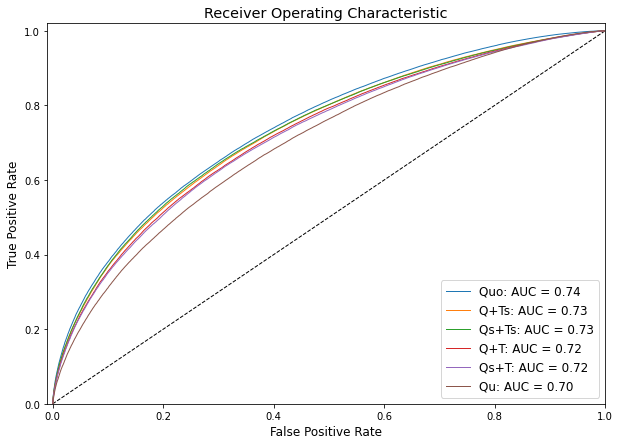

In [67]:
draw_roc_curve(base_path, labels, models_to_roc)

Found training logs:  ['./data/channel/Q+T/log_train_0.csv']


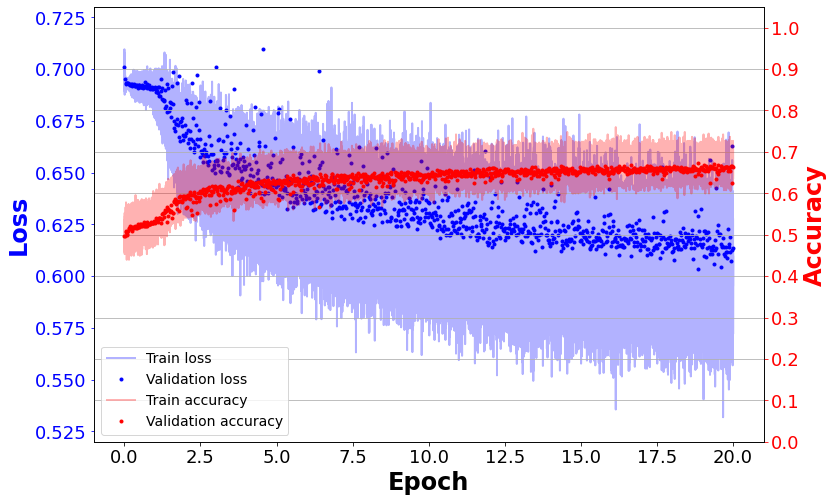

In [68]:
disp_learn_hist(base_path+'Q+T', losslims=(0.52, 0.73))

In [69]:
sf = []
mlabels = []

for mode in models_to_roc:
    sf.append(np.load(base_path+mode+'/softmax.npy'))
    mlabels.append(labels)
    
label_dict = {'gamma':0, 'electron':1}

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'Electron vs Gamma Rejection'}, xlabel='Electron Signal Efficiency', ylabel='Gamma Background Rejection'>]
[<AxesSubplot:title={'center':'Electron vs Gamma Rejection'}, xlabel='Electron Signal Efficiency', ylabel='Gamma Background Rejection'>]
[<AxesSubplot:title={'center':'Electron vs Gamma Rejection'}, xlabel='Electron Signal Efficiency', ylabel='Gamma Background Rejection'>]
[<AxesSubplot:title={'center':'Electron vs Gamma Rejection'}, xlabel='Electron Signal Efficiency', ylabel='Gamma Background Rejection'>]
[<AxesSubplot:title={'center':'Electron vs Gamma Rejection'}, xlabel='Electron Signal Efficiency', ylabel='Gamma Background Rejection'>]


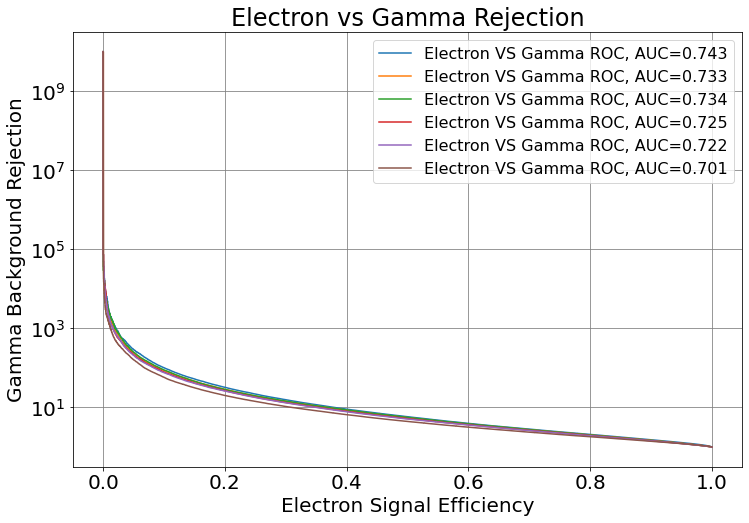

In [70]:
fprs, tprs, thrs = multi_compute_roc(sf, mlabels, 1, 0)
multi_plot_roc(fprs, tprs, thrs, 'Electron', 'Gamma', fig_list=[1], show=True)

# 2 - Time to order charge channels

In [71]:
base_path = './data/ordering/'

labels = np.load(base_path+'/labels.npy')
test_idxs = np.load(base_path+'/indices.npy')
split_idxs = np.load(base_path+'/IWCD_mPMT_Short_2_class_idxs_xps.npz')

subfolders = [os.path.basename(os.path.normpath(f.path)) for f in os.scandir(base_path) if f.is_dir()]

In [72]:
results = []
for mode in subfolders:
    results.append(basic_metrics(base_path, labels, mode))

In [73]:
pd.set_option("display.precision", 4)
df = pd.DataFrame(results)

df['scaled'] = np.where(df['model'].str.contains('u'), 0, 1)

df['total_score'] = df.acc+df.f1+df.auc-df.log_loss

df.sort_values(by='total_score', inplace=True, ascending=False)
df = df[['model', 'scaled', 'log_loss', 'acc', 'f1', 'auc', 'opt_threshold', 'total_score']].reset_index(drop=True)

df.head(len(subfolders))

,model,scaled,log_loss,acc,f1,auc,opt_threshold,total_score
0,Quo,0,0.5940,0.6747,0.6579,0.7434,0.4833,1.4820
1,Qu_tnorm,0,0.6272,0.6424,0.6320,0.7002,0.5019,1.3475
2,Qu,0,0.6271,0.6427,0.6203,0.7007,0.4866,1.3367
3,Qt,1,0.6358,0.6362,0.6372,0.6902,0.5190,1.3279
4,Qtu,0,0.6463,0.6192,0.6043,0.6679,0.5012,1.2451


In [74]:
draw_roc_curve(base_path, labels, t_order_mode)

NameError: name 't_order_mode' is not defined

Found training logs:  ['./data/Qt/log_train_0.csv']


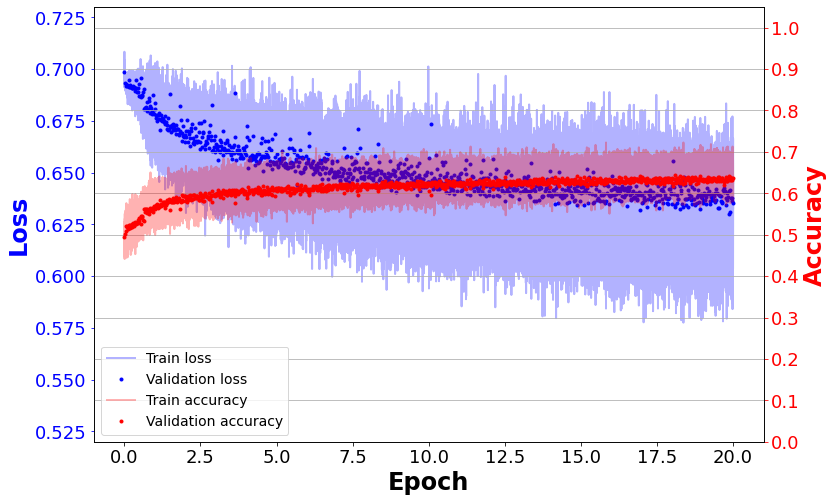

In [17]:
disp_learn_hist(base_path+'Qt', losslims=(0.52, 0.73))

# 3 - Cedar XPs

In [3]:
base_path = '/Users/mariateresaalvarez-buhillapuig/Desktop/cedar/'

labels = np.load(base_path+'/labels.npy')
test_idxs = np.load(base_path+'/indices.npy')
split_idxs = np.load(base_path+'IWCD_mPMT_Short_2_class_eg_9M_idxs.npz')

subfolders = [os.path.basename(os.path.normpath(f.path)) for f in os.scandir(base_path) if f.is_dir()]

In [4]:
data_splitting(split_idxs)

Total num. of events:  17702123
Events for testing: 13.334
Events for validation: 3.333
Events for training: 83.334


In [5]:
results = []
for mode in subfolders:
    results.append(basic_metrics(base_path, labels,mode))

In [6]:
pd.set_option("display.precision", 4)
df = pd.DataFrame(results)

df['charge'] = np.where(df['model'].str.contains('Q'), 1, 0)
df['time'] = np.where(df['model'].str.contains('T'), 1, 0)
df['scaled'] = np.where(df['model'].str.contains('u'), 0, 1)
df['collapsed'] = np.where(df['model'].str.contains('s'), 1, 0)

df['total_score'] = df.acc+df.f1+df.auc-df.log_loss

df.sort_values(by='total_score', inplace=True, ascending=False)
df = df[['model','charge', 'time', 'scaled', 'collapsed', 'log_loss', 'acc', 'f1', 'auc', 'opt_threshold', 'total_score']].reset_index(drop=True)

df.head(len(subfolders))

,model,charge,time,scaled,collapsed,log_loss,acc,f1,auc,opt_threshold,total_score
0,Q+Ts 1,1,1,1,1,0.5706,0.6998,0.6939,0.7712,0.5057,1.5942
1,Q+Ts,1,1,1,1,0.5716,0.6991,0.6889,0.7704,0.4930,1.5869
2,Q+T 1,1,1,1,0,0.5798,0.6928,0.6905,0.7621,0.5098,1.5655
3,Q+T,1,1,1,0,0.5797,0.6926,0.6891,0.7618,0.5130,1.5638
4,Q+T 2,1,1,1,0,0.5793,0.6932,0.6863,0.7623,0.5048,1.5625
5,Qs+Ts,1,1,1,1,0.5824,0.6900,0.6811,0.7585,0.4976,1.5472
6,Quo,1,0,0,0,0.5948,0.6750,0.6585,0.7426,0.4930,1.4813
7,Qu,1,0,0,0,0.5950,0.6745,0.6577,0.7421,0.4851,1.4792


In [7]:
df['mode'] = np.where(df['model'].str.contains(r'Q\+Ts', regex=True), 'Q+Ts', 
                      np.where(df['model'].str.contains(r'Q\+T', regex=True),'Q+T',
                               np.where(df['model'].str.contains(r'Qs\+Ts', regex=True),'Qs+Ts',
                                        np.where(df['model'].str.contains(r'Quo', regex=True),'Quo','Qu'))))

df.sort_values(by='total_score', inplace=True, ascending=False)
df = df[['mode','log_loss', 'acc', 'f1', 'auc','total_score']].reset_index(drop=True)

df_groupped = df.groupby('mode').mean()
df_groupped.sort_values(by='auc', inplace=True, ascending=False)
df_groupped['auc_std'] = df.groupby('mode')['auc'].std()
df_groupped['xps'] = df.groupby('mode')['auc'].count()
df_groupped

,log_loss,acc,f1,auc,total_score,auc_std,xps
mode,,,,,,,
Q+Ts,0.5711,0.6994,0.6914,0.7708,1.5906,0.0005,2
Q+T,0.5796,0.6929,0.6886,0.7621,1.5639,0.0003,3
Qs+Ts,0.5824,0.6900,0.6811,0.7585,1.5472,NaN,1
Quo,0.5948,0.6750,0.6585,0.7426,1.4813,NaN,1
Qu,0.5950,0.6745,0.6577,0.7421,1.4792,NaN,1


<AxesSubplot:title={'center':'auc'}, xlabel='mode'>

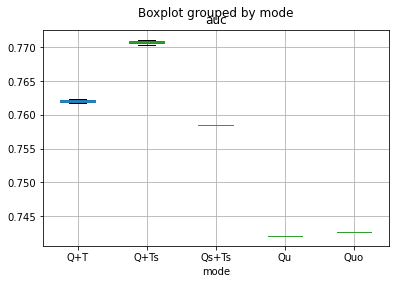

In [8]:
df.boxplot(column='auc', by='mode')

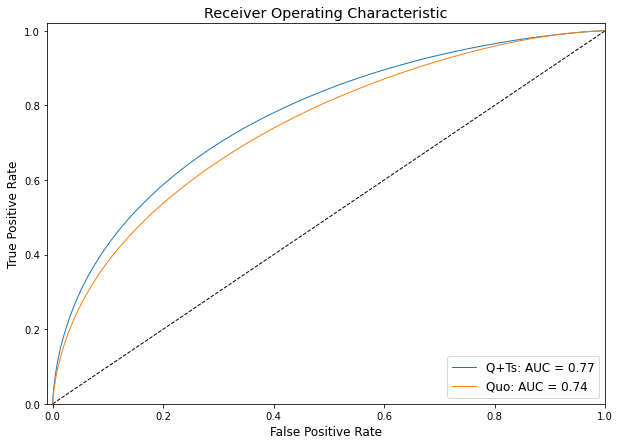

In [82]:
models_to_roc=['Q+Ts','Quo']
draw_roc_curve(base_path, labels, models_to_roc)

Found training logs:  ['/Users/mariateresaalvarez-buhillapuig/Desktop/cedar/Qs+Ts/log_train_0.csv', '/Users/mariateresaalvarez-buhillapuig/Desktop/cedar/Qs+Ts/log_train_1.csv', '/Users/mariateresaalvarez-buhillapuig/Desktop/cedar/Qs+Ts/log_train_3.csv', '/Users/mariateresaalvarez-buhillapuig/Desktop/cedar/Qs+Ts/log_train_2.csv']


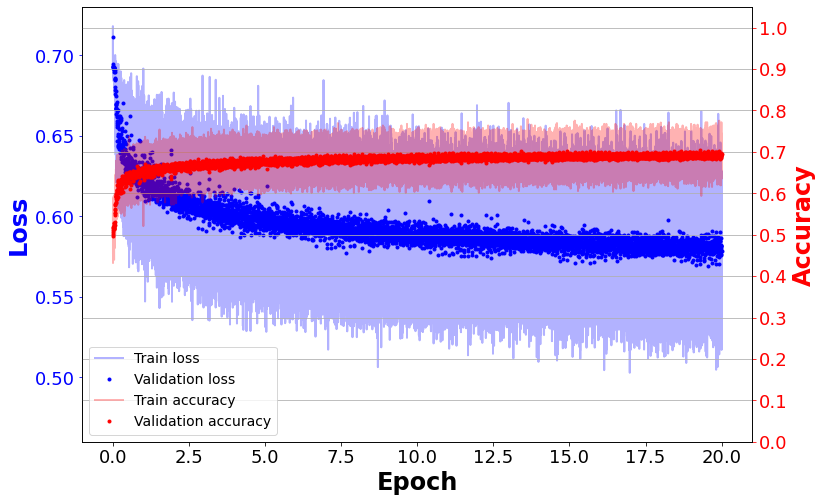

In [83]:
disp_learn_hist(base_path+'Qs+Ts', losslims=(0.46, 0.73))

Found training logs:  ['/Users/mariateresaalvarez-buhillapuig/Desktop/cedar/Q+Ts/log_train_0.csv', '/Users/mariateresaalvarez-buhillapuig/Desktop/cedar/Q+Ts/log_train_1.csv', '/Users/mariateresaalvarez-buhillapuig/Desktop/cedar/Q+Ts/log_train_3.csv', '/Users/mariateresaalvarez-buhillapuig/Desktop/cedar/Q+Ts/log_train_2.csv']


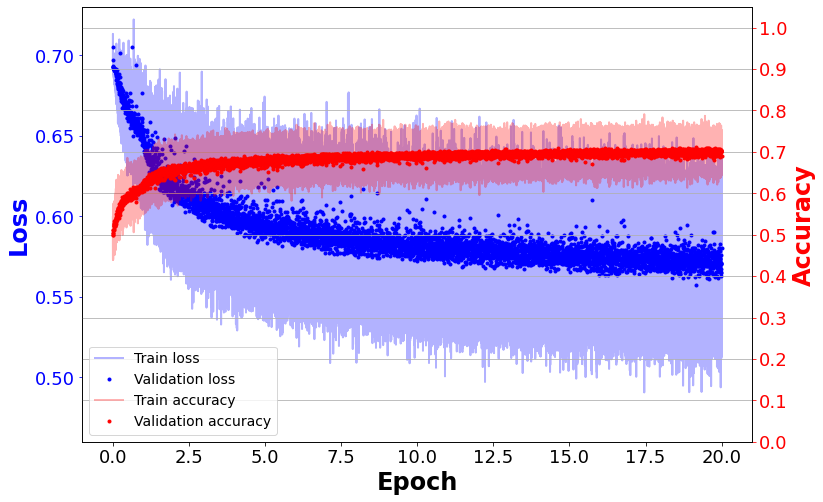

In [77]:
disp_learn_hist(base_path+'Q+Ts', losslims=(0.46, 0.73))

Found training logs:  ['/Users/mariateresaalvarez-buhillapuig/Desktop/cedar/Q+T/log_train_0.csv', '/Users/mariateresaalvarez-buhillapuig/Desktop/cedar/Q+T/log_train_1.csv', '/Users/mariateresaalvarez-buhillapuig/Desktop/cedar/Q+T/log_train_3.csv', '/Users/mariateresaalvarez-buhillapuig/Desktop/cedar/Q+T/log_train_2.csv']


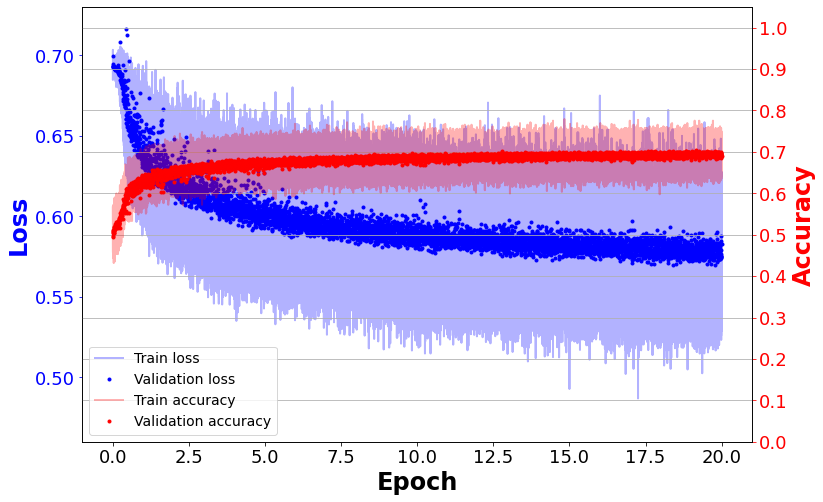

In [97]:
disp_learn_hist(base_path+'Q+T', losslims=(0.46, 0.73))

{'Gamma': 0, 'Electron': 1}
{'Gamma': 0, 'Electron': 1}


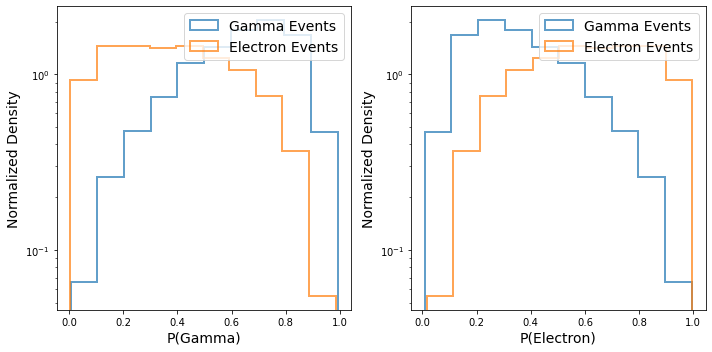

In [10]:
softmax = np.load(base_path+'/Q+Ts/softmax.npy')
label_dict = {'Gamma':0, 'Electron':1}

# Plot classifier likelihoods over different classes for events of a given particle type
plot_classifier_response(softmax, labels, ['Gamma', 'Electron'], label_dict)

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'Electron vs Gamma Rejection'}, xlabel='Electron Signal Efficiency', ylabel='Gamma Background Rejection'>]


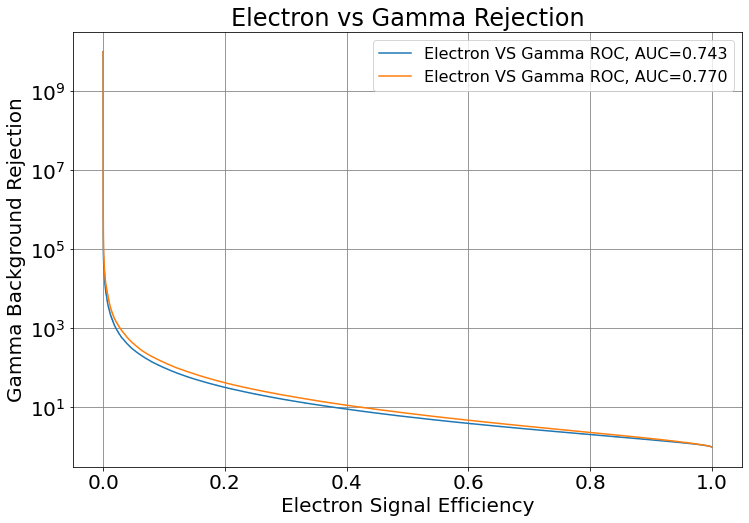

In [14]:
sf = []
mlabels = []

models_to_roc = ['Quo', 'Q+Ts']

for mode in models_to_roc:
    sf.append(np.load(base_path+mode+'/softmax.npy'))
    mlabels.append(labels)
    
label_dict = {'gamma':0, 'electron':1}

fprs, tprs, thrs = multi_compute_roc(sf, mlabels, 1, 0)
multi_plot_roc(fprs, tprs, thrs, 'Electron', 'Gamma', fig_list=[1], show=True)

# 4 - Transformations

In [3]:
base_path = '/Users/mariateresaalvarez-buhillapuig/Desktop/transf_qts/'

labels = np.load(base_path+'/labels.npy')
test_idxs = np.load(base_path+'/indices.npy')
split_idxs = np.load(base_path+'IWCD_mPMT_Short_2_class_idxs_xps.npz')

subfolders = [os.path.basename(os.path.normpath(f.path)) for f in os.scandir(base_path) if f.is_dir()]

In [4]:
data_splitting(split_idxs)

Total num. of events:  2950284
Events for testing: 10.004
Events for validation: 2.399
Events for training: 87.596


In [5]:
results = []
for mode in subfolders:
    results.append(basic_metrics(base_path, labels,mode))

In [6]:
pd.set_option("display.precision", 4)
df = pd.DataFrame(results)

df['total_score'] = df.acc+df.f1+df.auc-df.log_loss

df = df[['model', 'log_loss', 'acc', 'f1', 'auc', 'opt_threshold', 'total_score']]

#df['transf_depth'] = df.model.str.extract('(\d+)').astype(int)
#df.drop(columns='model', inplace=True)
df.sort_values(['total_score'], inplace=True, ascending=False)
#df = df.reset_index(drop=True)
#df = df.reset_index()
#df.set_index(['transf_depth','index'], inplace=True)

df.head()

,model,log_loss,acc,f1,auc,opt_threshold,total_score
6,k2_1,0.6020,0.6728,0.6710,0.7363,0.5092,1.4780
15,k5_2,0.6032,0.6713,0.6716,0.7348,0.5232,1.4746
0,k4_2,0.6011,0.6740,0.6625,0.7373,0.5067,1.4727
1,k3,0.6067,0.6697,0.6751,0.7338,0.5250,1.4718
16,k3_1,0.6018,0.6718,0.6577,0.7362,0.4812,1.4638


In [7]:
pd.set_option("display.precision", 4)
df = pd.DataFrame(results)

df['total_score'] = df.acc+df.f1+df.auc-df.log_loss

df = df[['model', 'log_loss', 'acc', 'f1', 'auc', 'total_score']]

df['transf_depth'] = df.model.str.extract('(\d+)').astype(int)
#df = df[['transf_depth','auc']]

df_groupped = df.groupby('transf_depth').mean()
df_groupped.sort_values(by='auc', inplace=True, ascending=False)
df_groupped['auc_std'] = df.groupby('transf_depth')['auc'].std()
df_groupped['xps'] = df.groupby('transf_depth')['auc'].count()
df_groupped

,log_loss,acc,f1,auc,total_score,auc_std,xps
transf_depth,,,,,,,
4,0.6018,0.6728,0.6538,0.7367,1.4614,0.0008,3
2,0.6030,0.6712,0.6571,0.7351,1.4603,0.0010,3
3,0.6042,0.6708,0.6609,0.7347,1.4622,0.0013,3
5,0.6047,0.6699,0.6561,0.7339,1.4551,0.0009,3
1,0.6050,0.6702,0.6550,0.7334,1.4536,0.0013,3
0,0.6224,0.6539,0.6468,0.7114,1.3896,0.0028,3


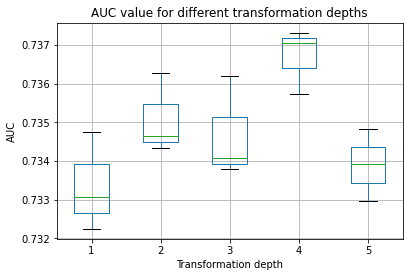

In [19]:
df[df['transf_depth']!=0].boxplot(column='auc', by='transf_depth')
plt.title('AUC value for different transformation depths')
plt.ylabel('AUC')
plt.xlabel('Transformation depth')
plt.suptitle('')
plt.show()

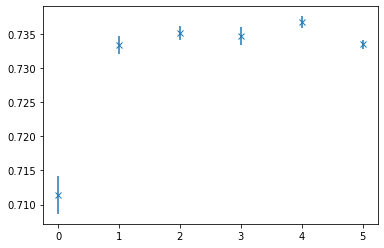

In [10]:
plt.errorbar(df_groupped.index, df_groupped['auc'], df_groupped['auc_std'], linestyle='None', fmt='-x')
plt.show()

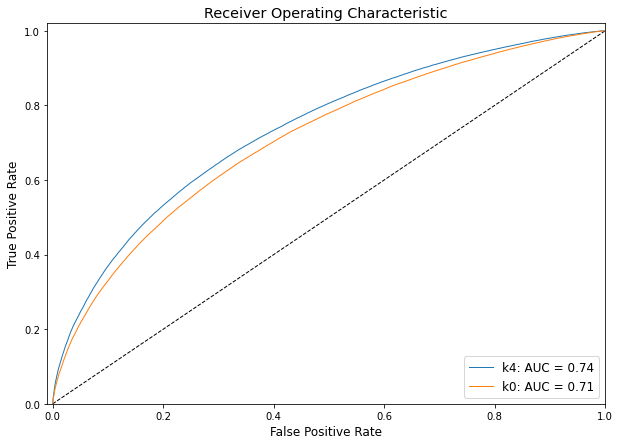

In [95]:
draw_roc_curve(base_path, labels, ['k4','k0'])

Found training logs:  ['/Users/mariateresaalvarez-buhillapuig/Desktop/transf_qts/k3/log_train_0.csv']


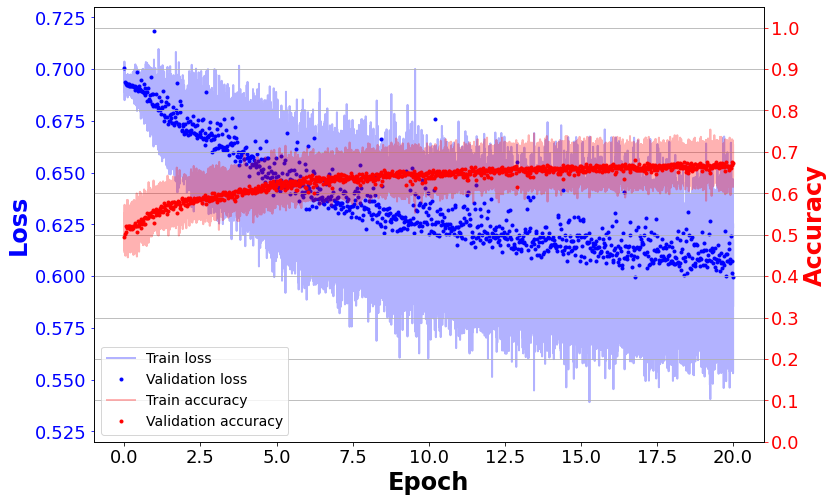

In [11]:
disp_learn_hist(base_path+'k3', losslims=(0.52, 0.73))

Found training logs:  ['/Users/mariateresaalvarez-buhillapuig/Desktop/transf_qts/k1/log_train_0.csv']


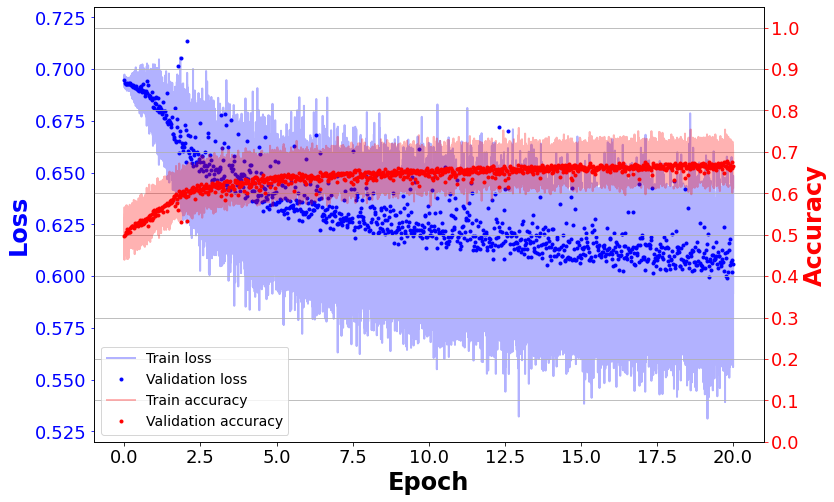

In [71]:
disp_learn_hist(base_path+'k1', losslims=(0.52, 0.73))